0.095
r_g=3: theta_1, i, amp [ 1.53876393e+01 -1.41898954e+01  1.03778327e-02  5.50619638e-01]


Text(0, 0.5, 'Counts')

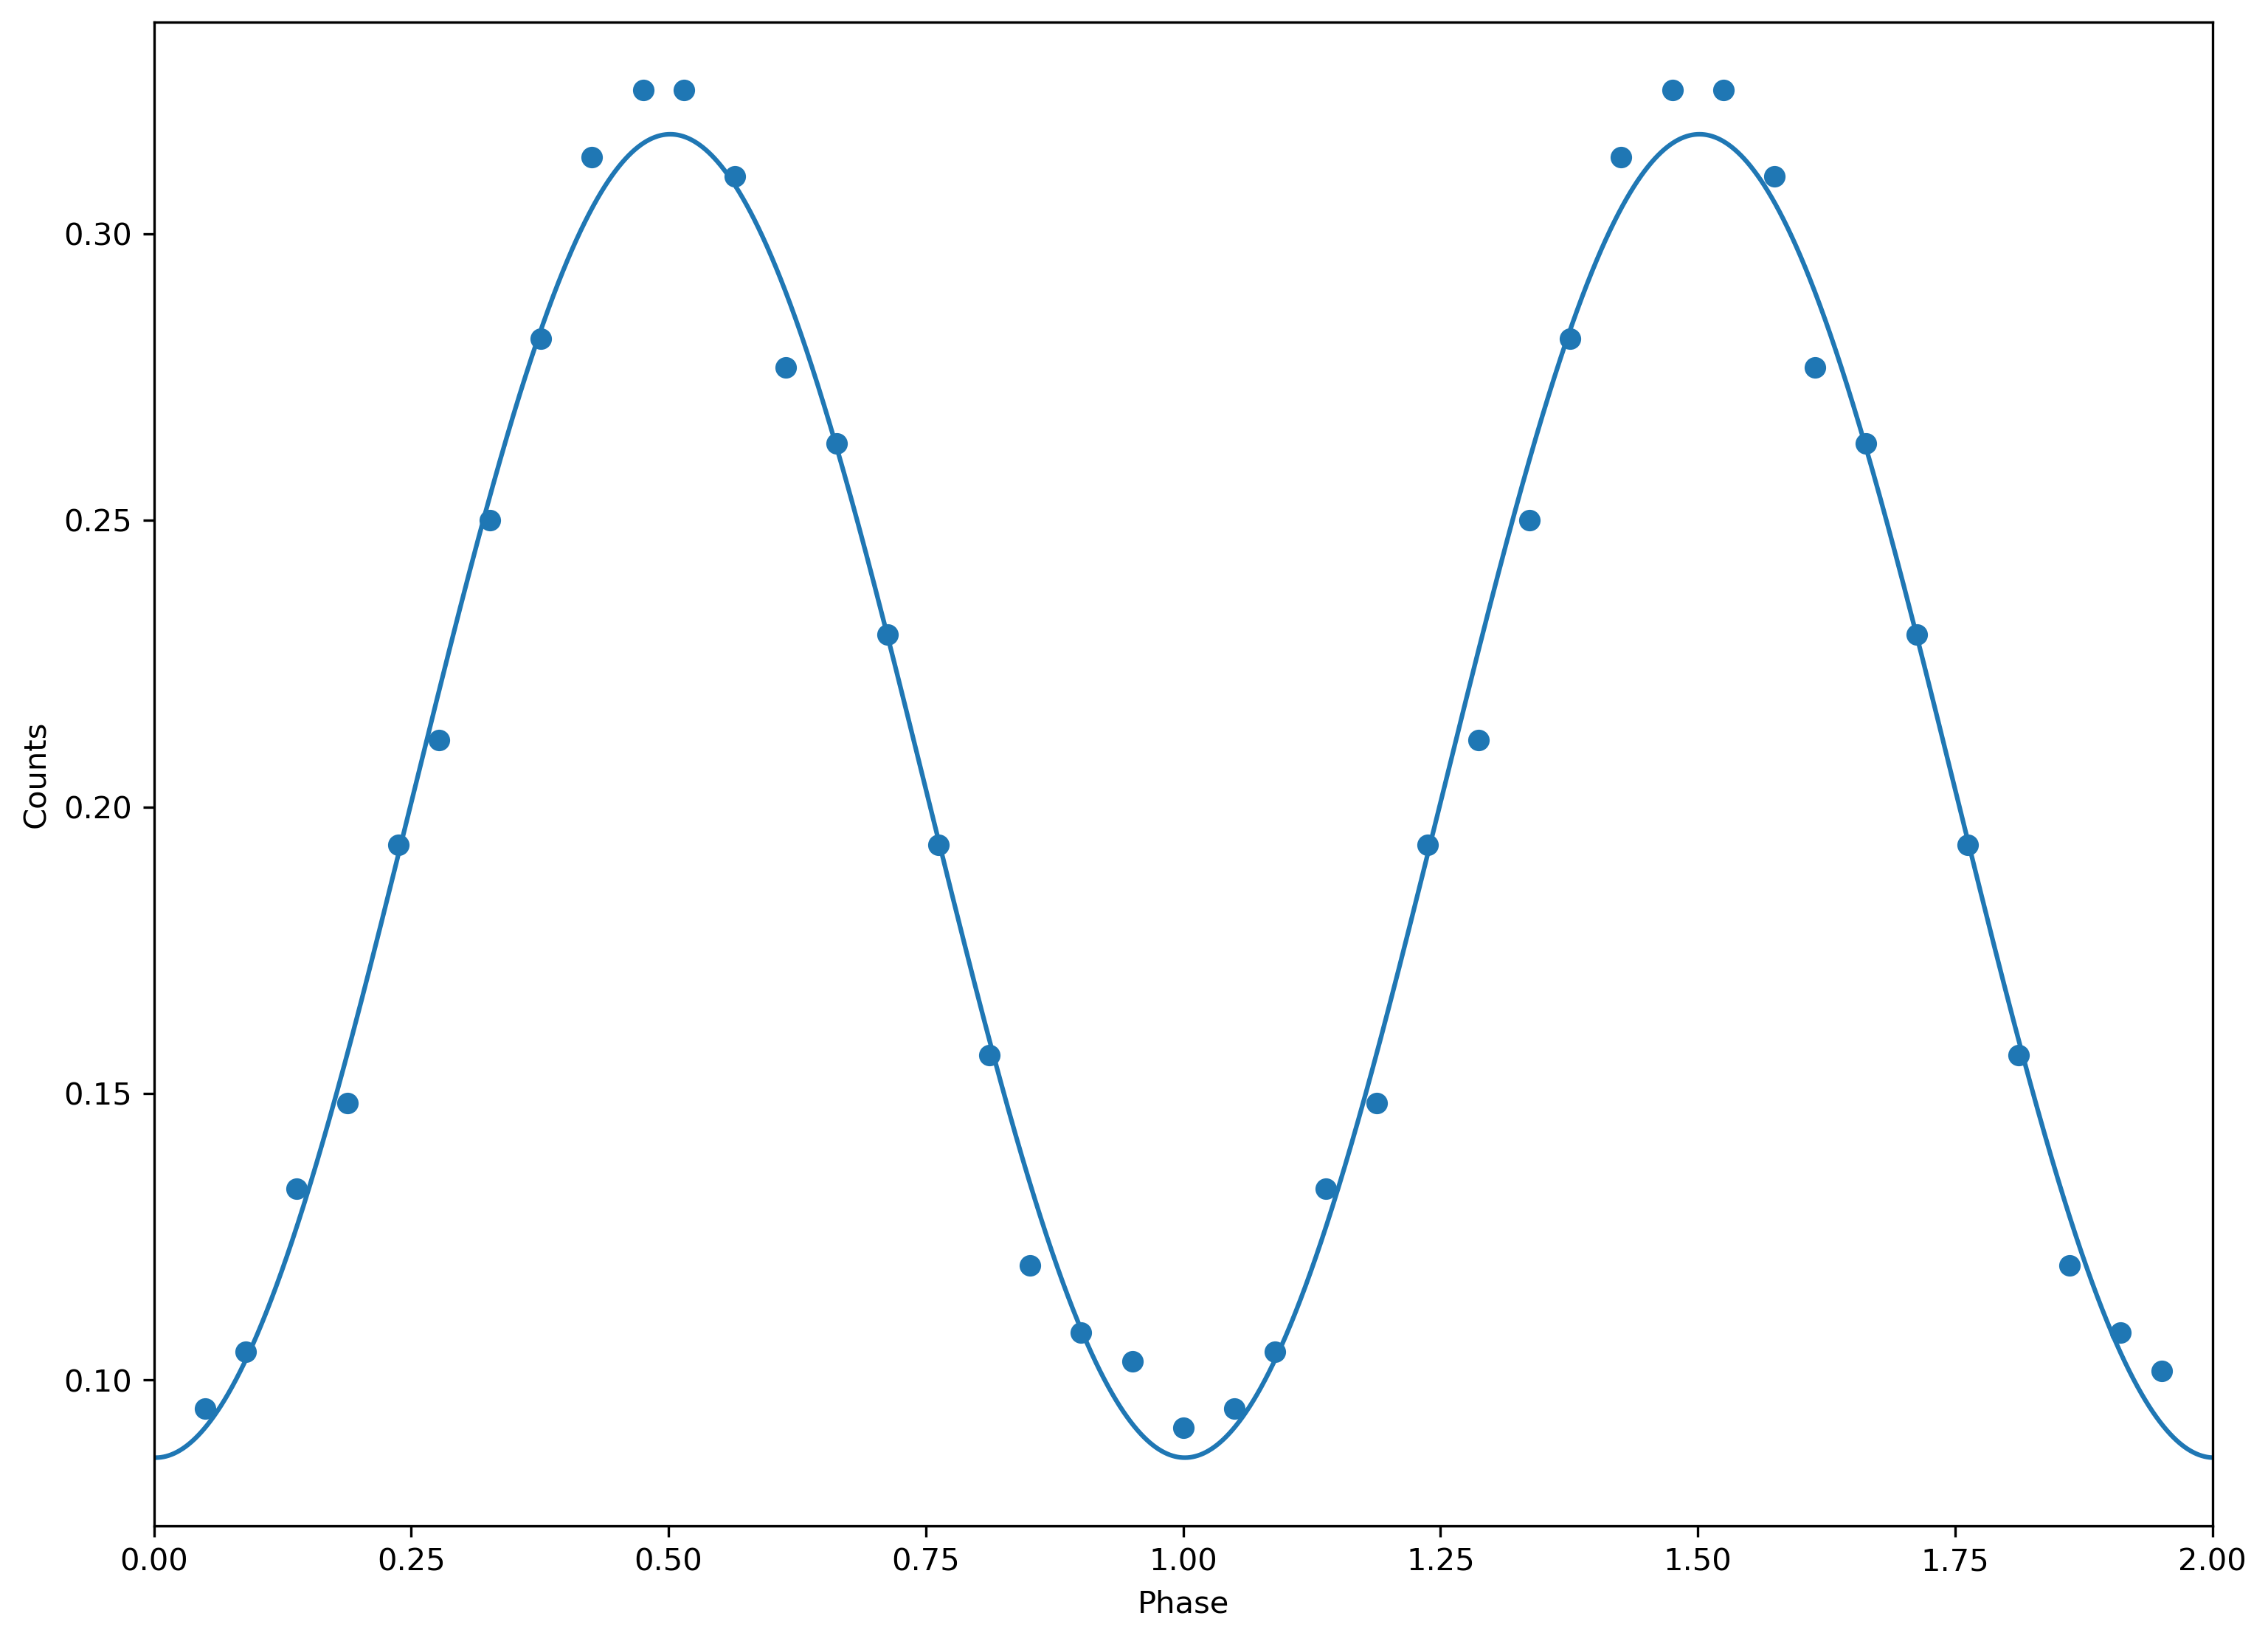

In [29]:
#set lapse as 1/3, single hot spot with beaming effect

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('3XMM J185246.6+003317_0.3-10keV_MOS2_2008.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

parameter_initial = np.array([0.98, 0.8, 0.01, 0.32])

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

# sigma
dy_error = 0.12353422416143986 - 0.12029815471320787
dy = np.empty(len(x_data))
for i in range(len(x_data)):
    dy[i] = dy_error

paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial, sigma = dy)
print("r_g=3: theta_1, i, amp", paramater_optimal)
fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2],  paramater_optimal[3])

y_fit = func(x_data, *paramater_optimal)
# r = y_data - y_fit
# stdev = 51 / 2793 * y_data
# chisq = np.sum((r / stdev) ** 2)
# N_data = 40
# N_para = 6
# dof = N_data - N_para
# reduced_chisq = chisq / dof

# print("chisq is " , chisq)
# print("Reduced chisq is ", reduced_chisq)


fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
plt.scatter(x_data, y_data)
plt.xlim(0, 2)
plt.plot(x, fitting)
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')

0.095
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
0.0
r_g=3: theta_1, i, amp [0.0, 0.08726646, 0.17453292, 0.26179938, 0.34906584, 0.4363323, 0.52359876, 0.61086522, 0.69813168, 0.7853981400000001, 0.8726646, 0.9599310600000001, 1.04719752, 1.13446398, 1.22173044, 1.3089969000000001, 1.39626336, 1.48352982, 1.5707962800000002, 1.65806274, 1.7453292, 1.8325956600000002, 1.9198621200000001, 2.0071285800000003, 2.09439504, 2.1816615, 2.26892796, 2.35619442, 2.44346088, 2.5307273400000003, 2.6179938000000003] 0.524 0 0.3
[0.26378437 0.26378438 0.26378443 ... 0.26378443 0.26378438 0.26378437]


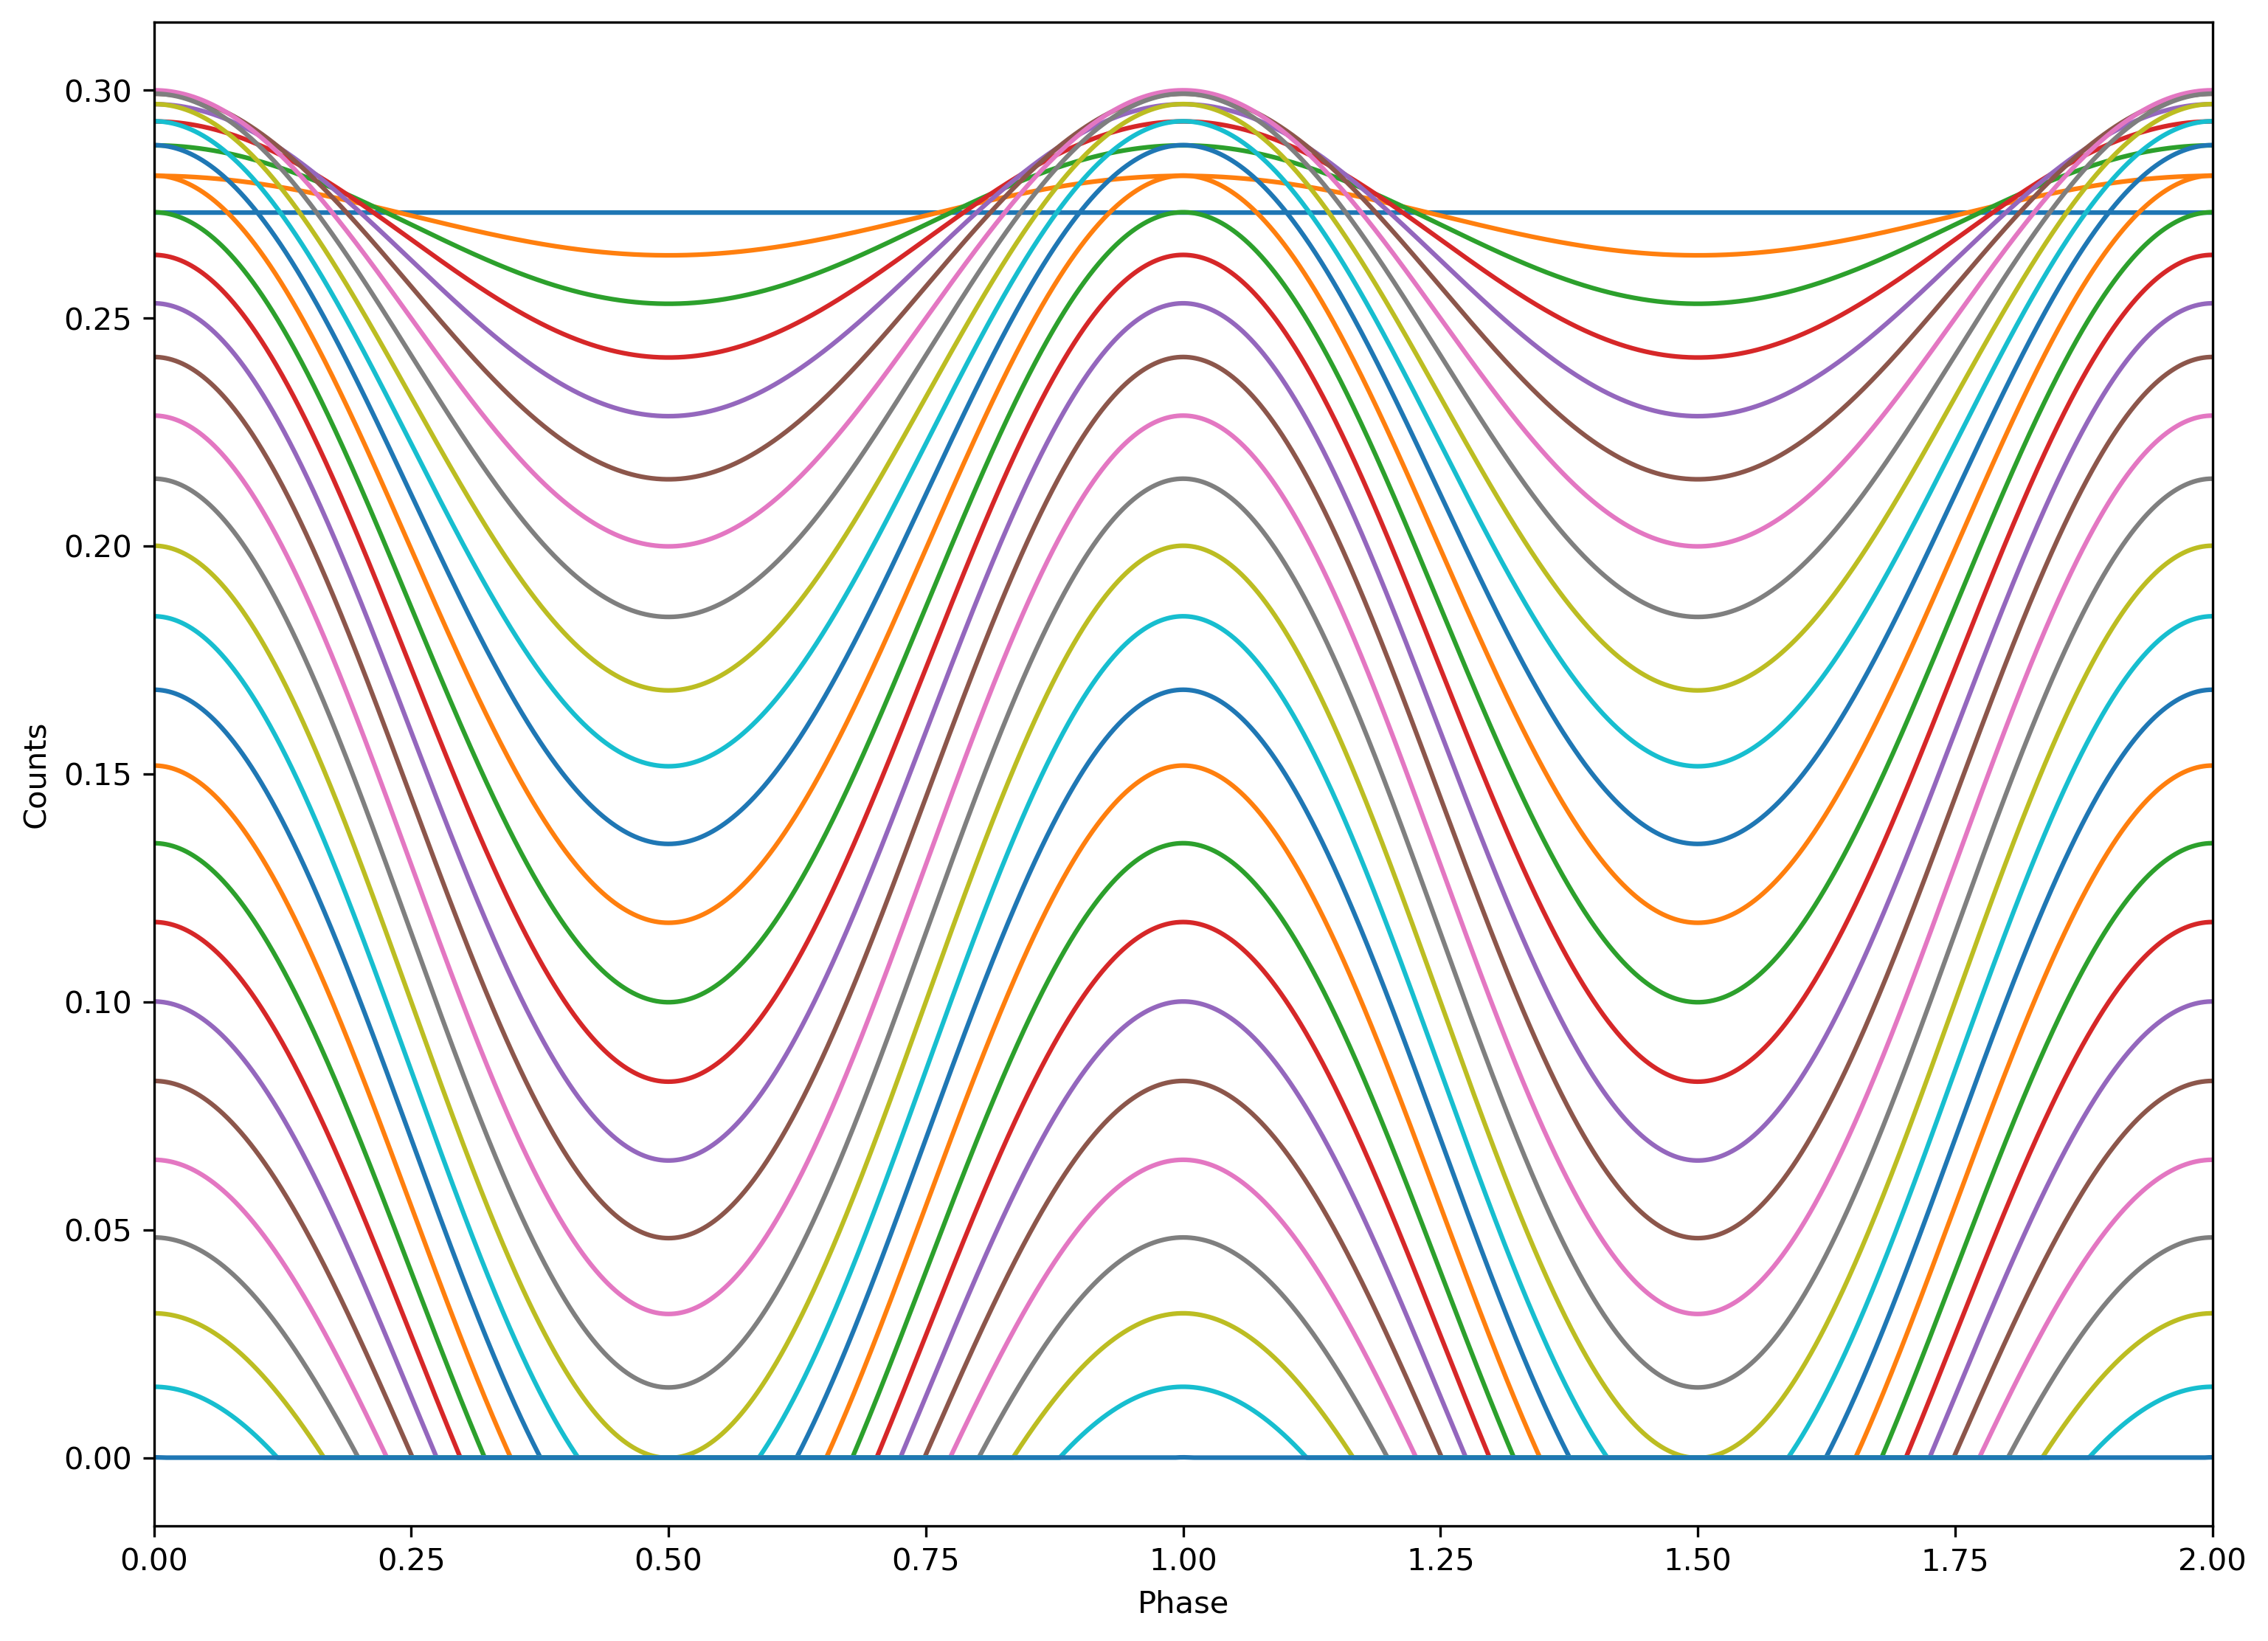

In [16]:
#set lapse as 1/3, single hot spot (with beaming effect?)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('3XMM J185246.6+003317_0.3-10keV_MOS2_2008.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

#parameter_initial = np.array([0.98, 0.8, 0.01, 0.32])
d_a = 0.08726646
a=[]
for i in range(0, 31):
    print(i)
    a.append(i * d_a) 
print(a[0])
b = 0.524
c = 0
d = 0.3

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

# sigma
# dy_error = 0.12353422416143986 - 0.12029815471320787
# dy = np.empty(len(x_data))
# for i in range(len(x_data)):
#     dy[i] = dy_error

# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial, sigma = dy)
# print("r_g=3: theta_1, i, amp", paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2],  paramater_optimal[3])
print("r_g=3: theta_1, i, amp", a, b, c, d)

y_fit = []
for j in range(0, 31):
    y_fit.append(func(x, a[j], b, c, d))

print(y_fit[1])
    
#print(y_fit[0], y_fit[1])
# r = y_data - y_fit
# stdev = 51 / 2793 * y_data
# chisq = np.sum((r / stdev) ** 2)
# N_data = 40
# N_para = 6
# dof = N_data - N_para
# reduced_chisq = chisq / dof

# print("chisq is " , chisq)
# print("Reduced chisq is ", reduced_chisq)


fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
#plt.scatter(x_data, y_data)
ax.set_xlim(0, 2)
for k in range(0, 31):
    ax.plot(x, y_fit[k])
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')
plt.show()

0.095
r_g=3: theta_1, i, amp 0.087 0.524 0 0.3
0.2638149481313764 0.2638149635823761


Text(0, 0.5, 'Counts')

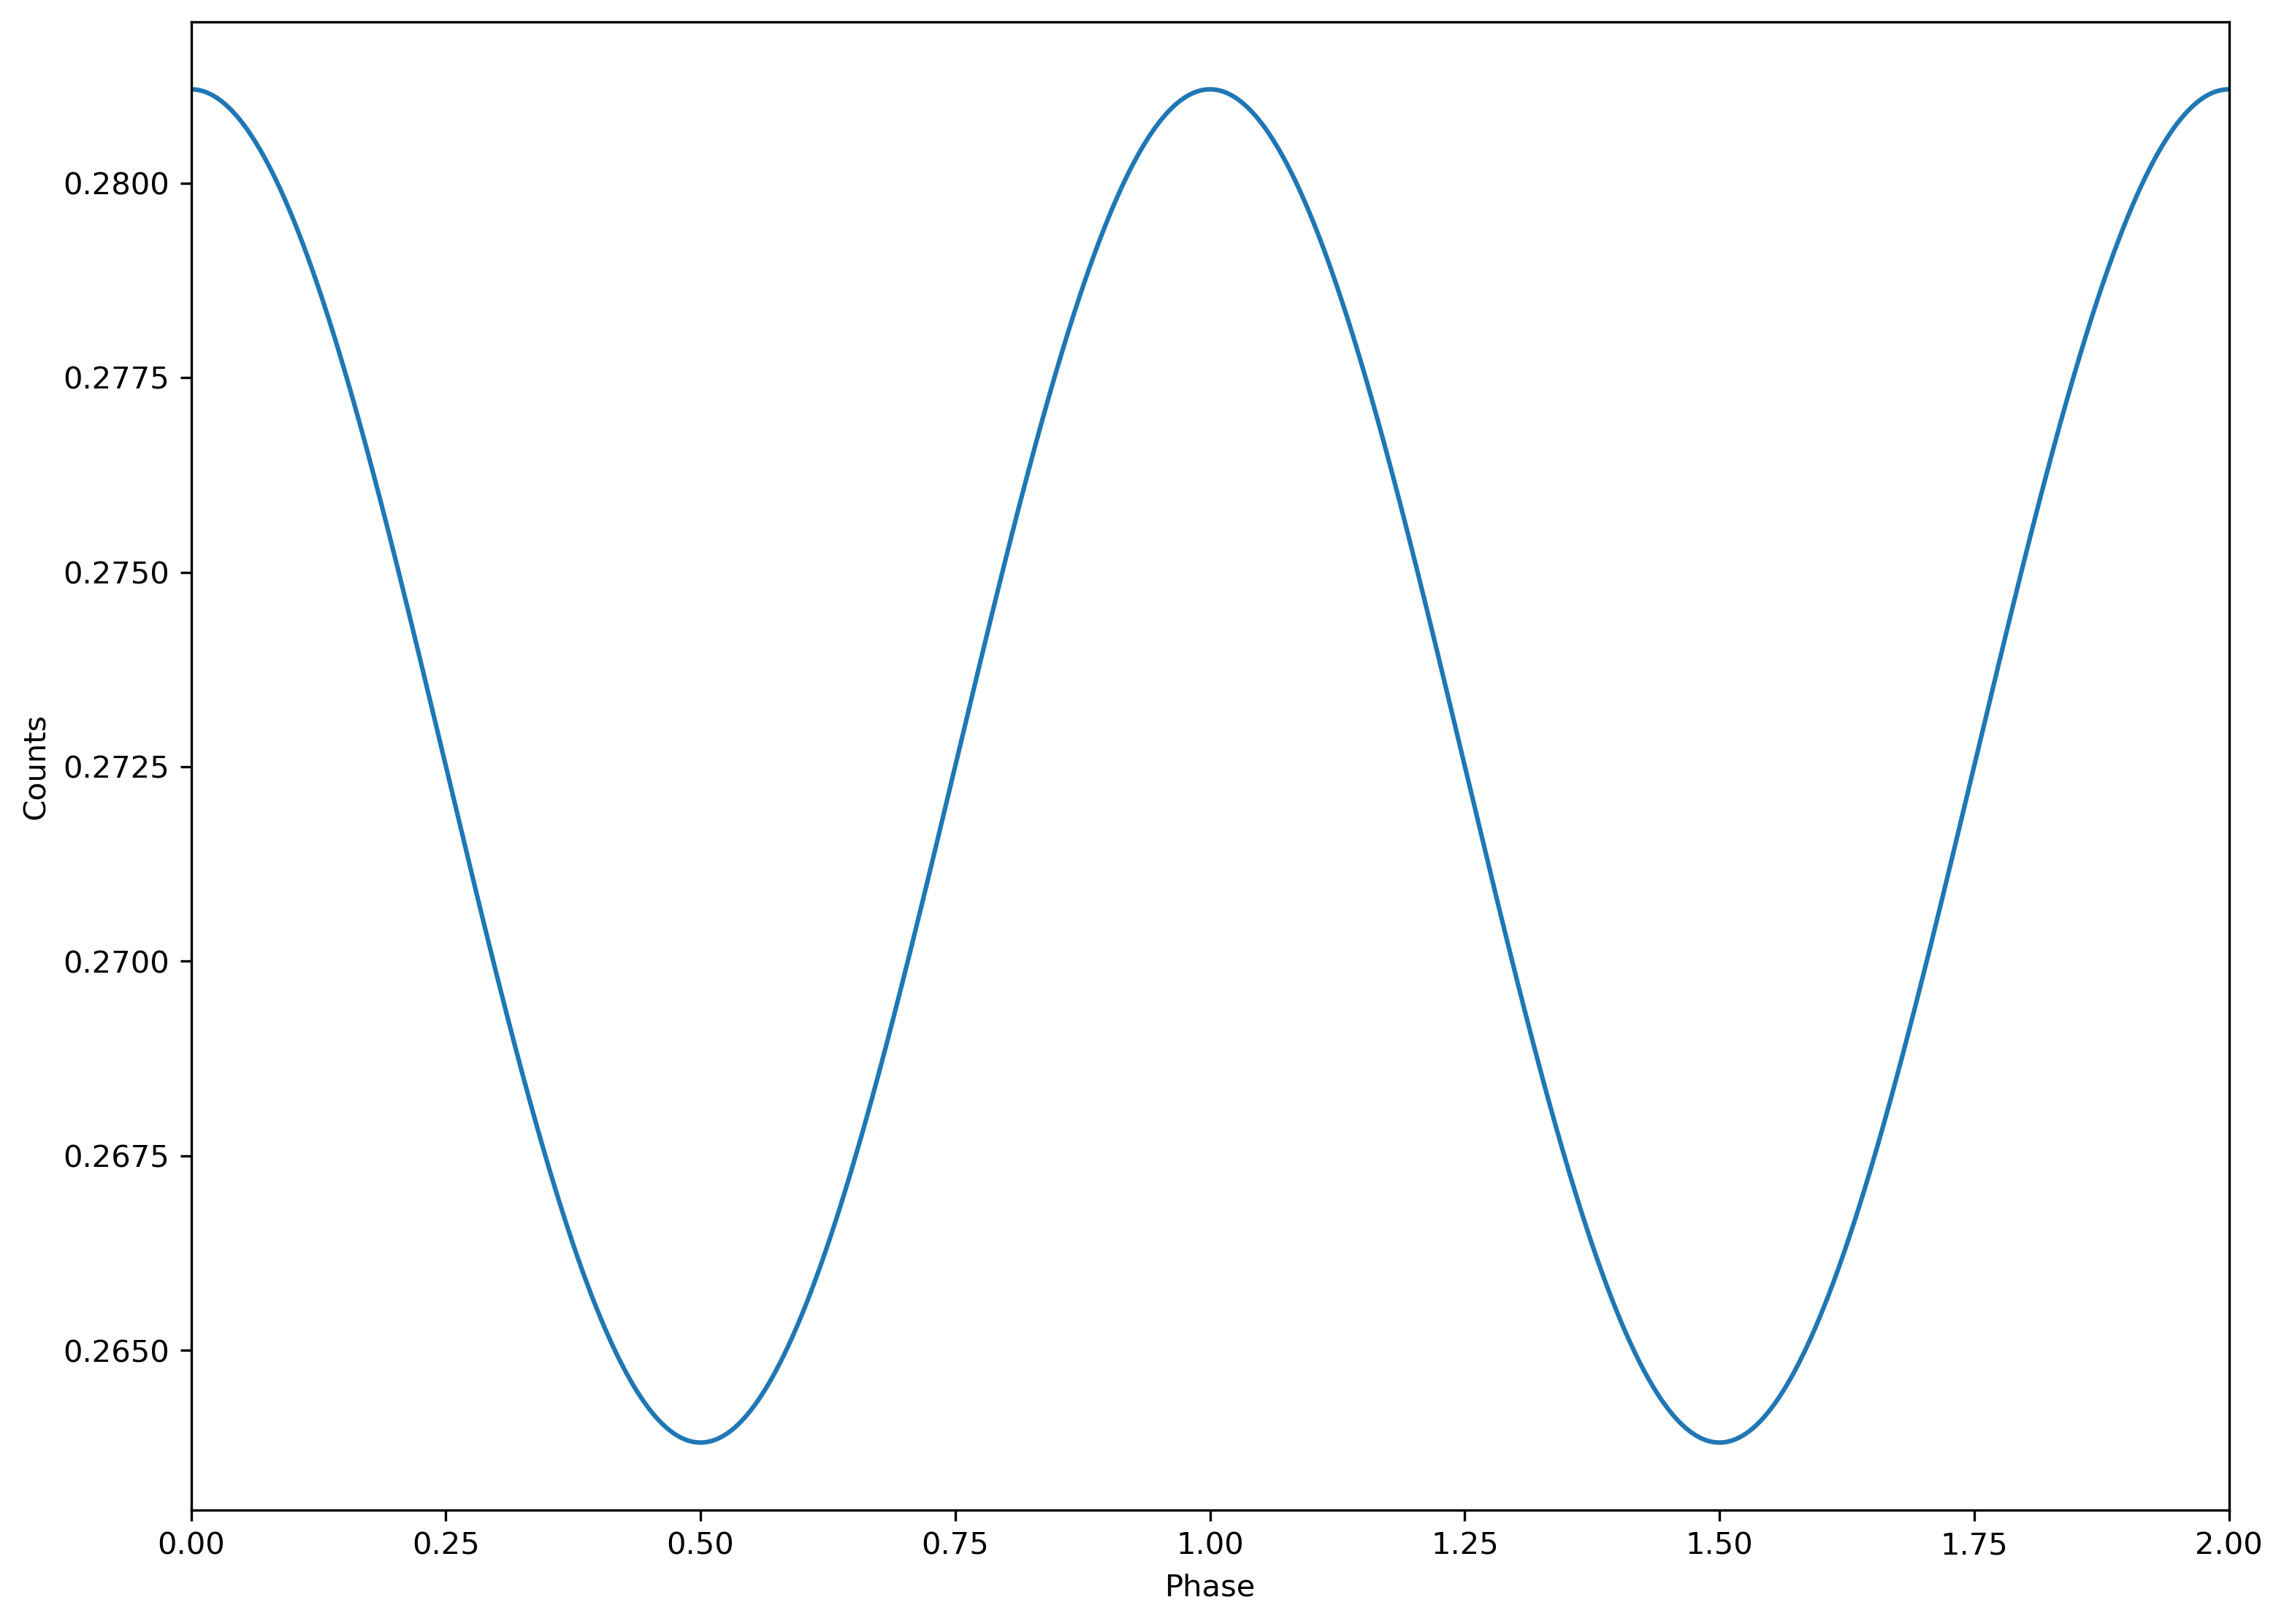

In [6]:
#set lapse as 1/3, single hot spot (with beaming effect?)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('3XMM J185246.6+003317_0.3-10keV_MOS2_2008.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

#parameter_initial = np.array([0.98, 0.8, 0.01, 0.32])
a = 0.087
b = 0.524
c = 0
d = 0.3

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

# sigma
# dy_error = 0.12353422416143986 - 0.12029815471320787
# dy = np.empty(len(x_data))
# for i in range(len(x_data)):
#     dy[i] = dy_error

# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial, sigma = dy)
# print("r_g=3: theta_1, i, amp", paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2],  paramater_optimal[3])
print("r_g=3: theta_1, i, amp", a, b, c, d)

y_fit = func(x, a, b, c, d)
print(y_fit[0], y_fit[1])
# r = y_data - y_fit
# stdev = 51 / 2793 * y_data
# chisq = np.sum((r / stdev) ** 2)
# N_data = 40
# N_para = 6
# dof = N_data - N_para
# reduced_chisq = chisq / dof

# print("chisq is " , chisq)
# print("Reduced chisq is ", reduced_chisq)


fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
#plt.scatter(x_data, y_data)
plt.xlim(0, 2)
plt.plot(x, y_fit)
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')

0.095
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
0.0
r_g=3: theta_1, i, amp [0.0, 0.08726646, 0.17453292, 0.26179938, 0.34906584, 0.4363323, 0.52359876, 0.61086522, 0.69813168, 0.7853981400000001, 0.8726646, 0.9599310600000001, 1.04719752, 1.13446398, 1.22173044, 1.3089969000000001, 1.39626336, 1.48352982, 1.5707962800000002, 1.65806274, 1.7453292, 1.8325956600000002, 1.9198621200000001, 2.0071285800000003, 2.09439504, 2.1816615, 2.26892796, 2.35619442, 2.44346088, 2.5307273400000003, 2.6179938000000003] 0.524 0 0.3
[0.24567655 0.24567658 0.24567665 ... 0.24567665 0.24567658 0.24567655]


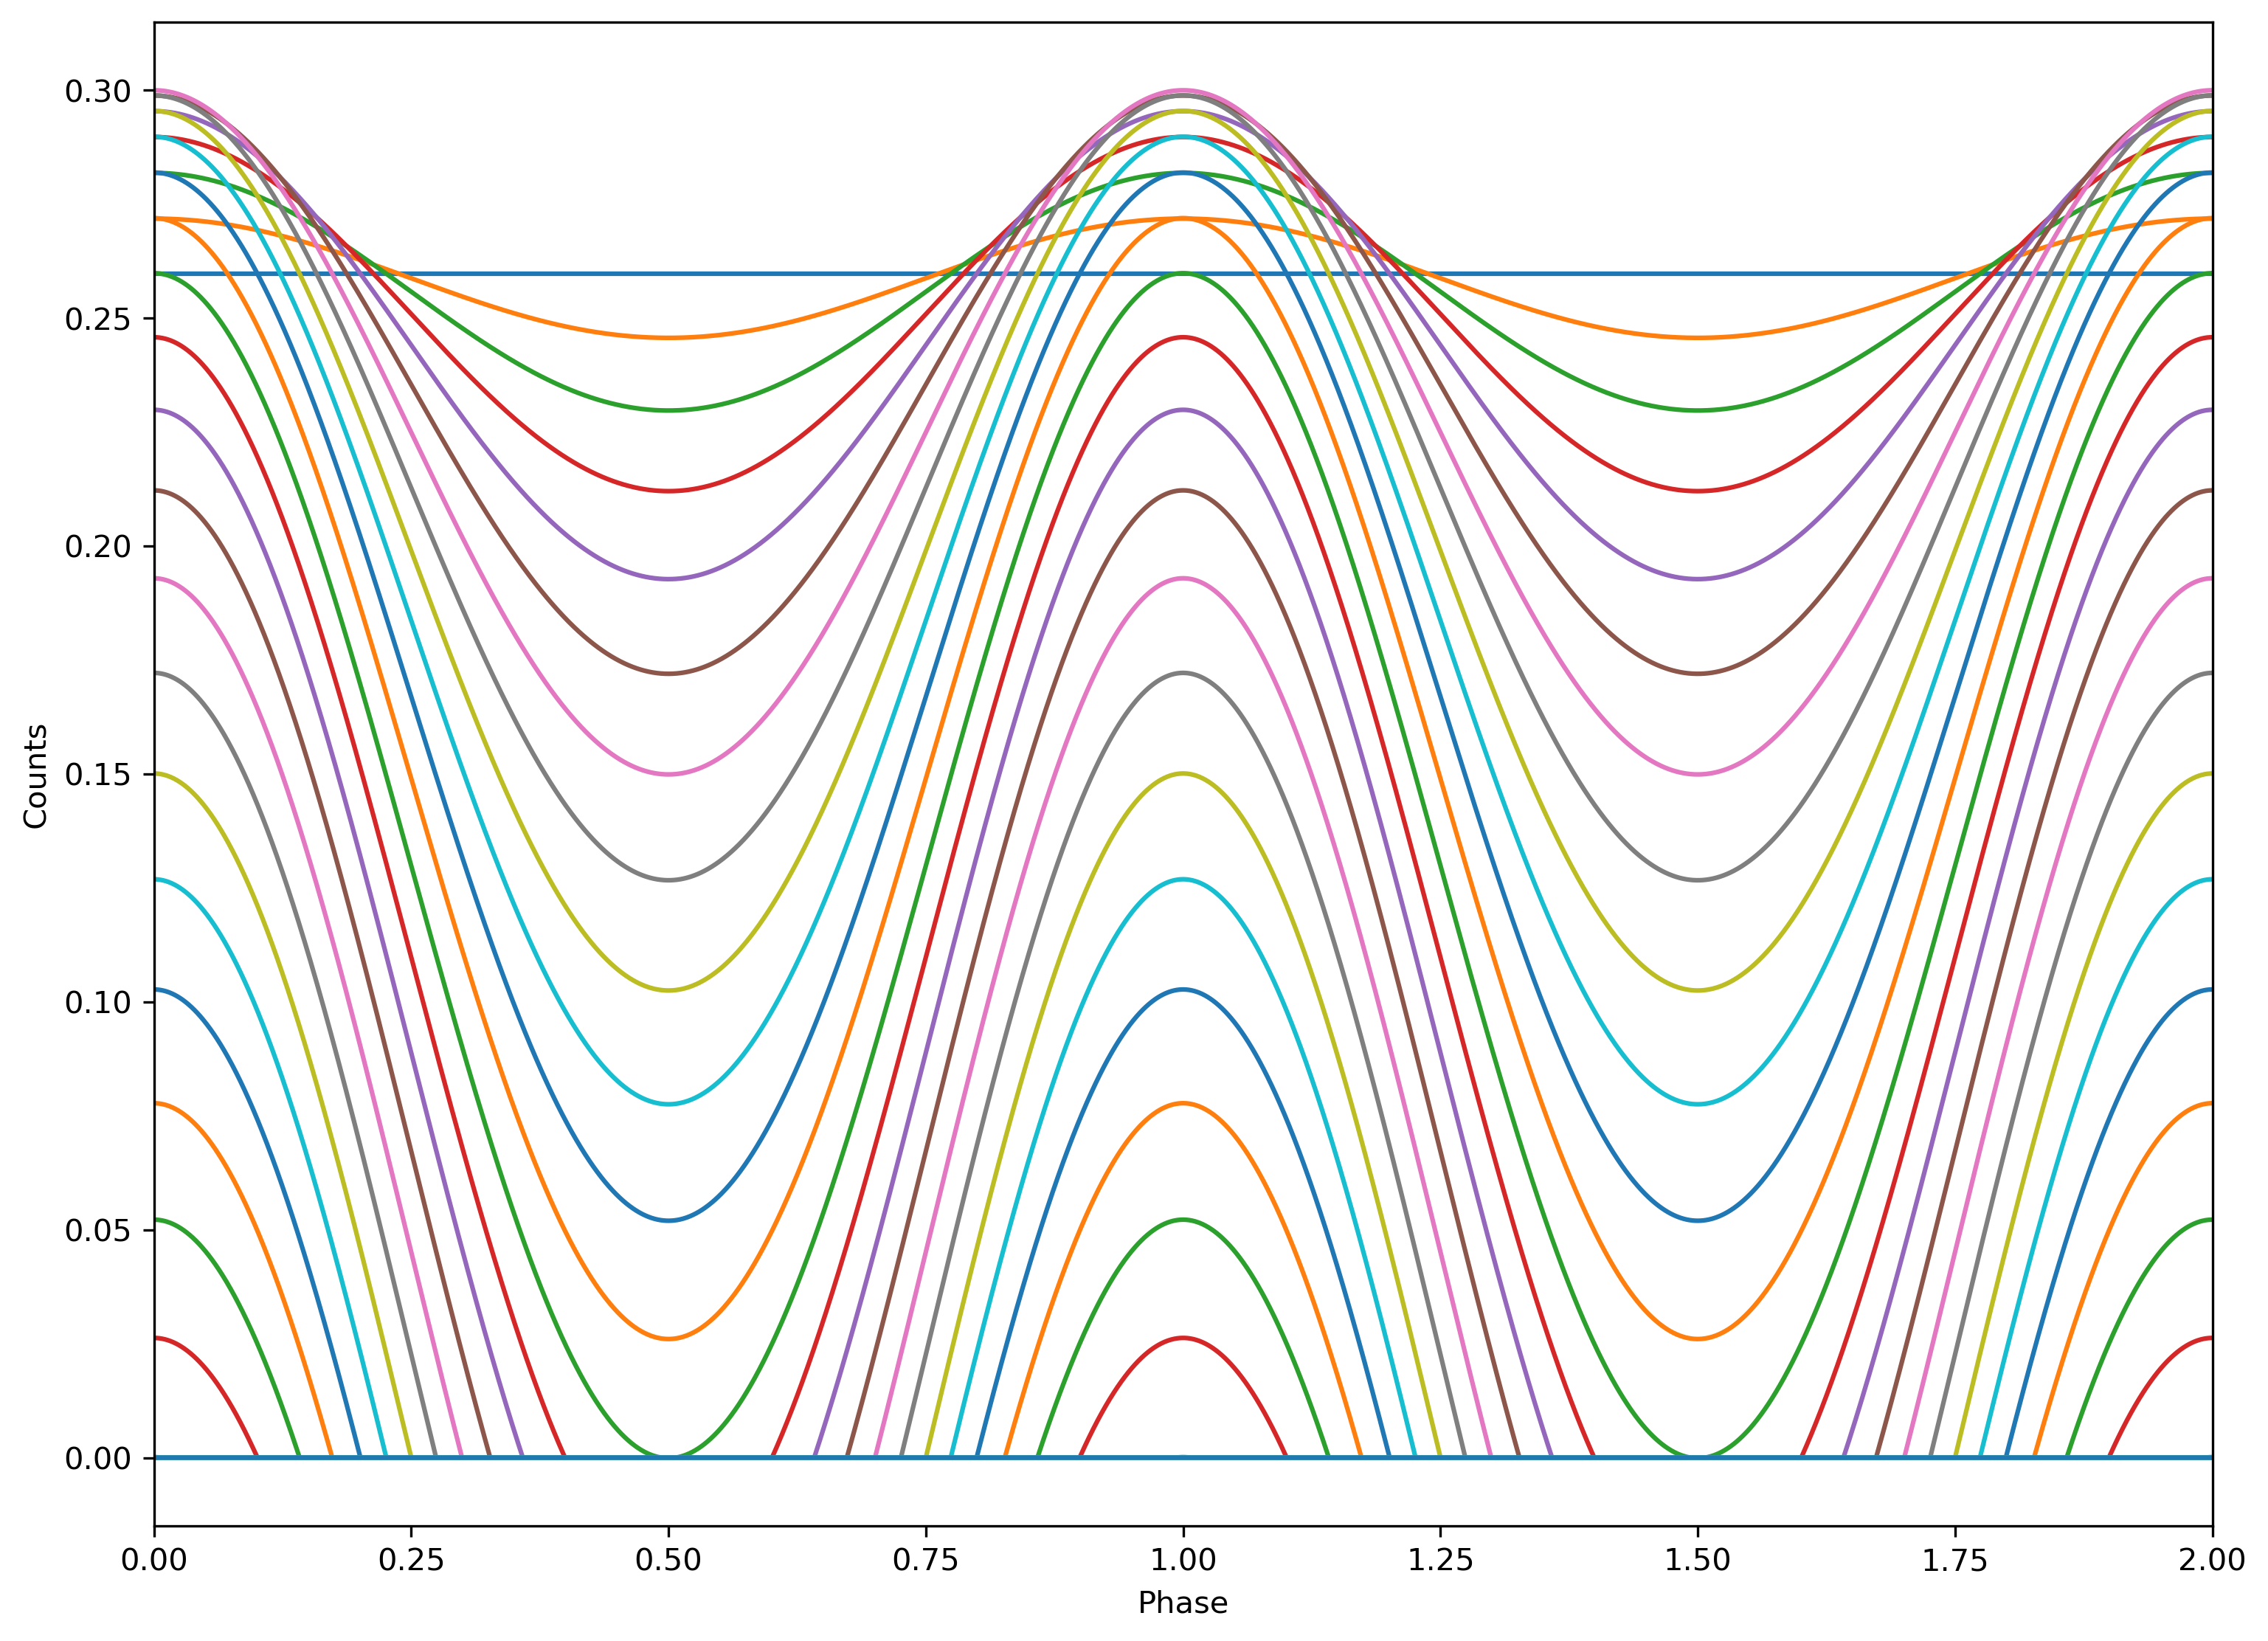

In [17]:
#set lapse as 0, single hot spot (with beaming effect?)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 0.) + 0.)
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('3XMM J185246.6+003317_0.3-10keV_MOS2_2008.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

#parameter_initial = np.array([0.98, 0.8, 0.01, 0.32])
d_a = 0.08726646
a=[]
for i in range(0, 31):
    print(i)
    a.append(i * d_a) 
print(a[0])
b = 0.524
c = 0
d = 0.3

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

# sigma
# dy_error = 0.12353422416143986 - 0.12029815471320787
# dy = np.empty(len(x_data))
# for i in range(len(x_data)):
#     dy[i] = dy_error

# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial, sigma = dy)
# print("r_g=3: theta_1, i, amp", paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2],  paramater_optimal[3])
print("r_g=3: theta_1, i, amp", a, b, c, d)

y_fit = []
for j in range(0, 31):
    y_fit.append(func(x, a[j], b, c, d))

print(y_fit[1])
    
#print(y_fit[0], y_fit[1])
# r = y_data - y_fit
# stdev = 51 / 2793 * y_data
# chisq = np.sum((r / stdev) ** 2)
# N_data = 40
# N_para = 6
# dof = N_data - N_para
# reduced_chisq = chisq / dof

# print("chisq is " , chisq)
# print("Reduced chisq is ", reduced_chisq)


fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
#plt.scatter(x_data, y_data)
ax.set_xlim(0, 2)
for k in range(0, 31):
    ax.plot(x, y_fit[k])
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')
plt.show()